# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import cross_val_score as cvs

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import os
from sys import platform

# Import the csv file used to create the model

In [21]:
df = pd.read_csv("../data/train.csv")
df.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
12642,12642,0.7,Ideal,H,SI1,62.5,55.0,5.69,5.71,3.56,7.738


# Exploration of features

    carat, cut, color, clarity, depth, table, x, y, z

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [23]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No NaN. All are numeric, except for cut, color, and clarity

## Numeric variables

### Carat

In [24]:
df.carat.describe()

count    40455.000000
mean         0.796804
std          0.473977
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

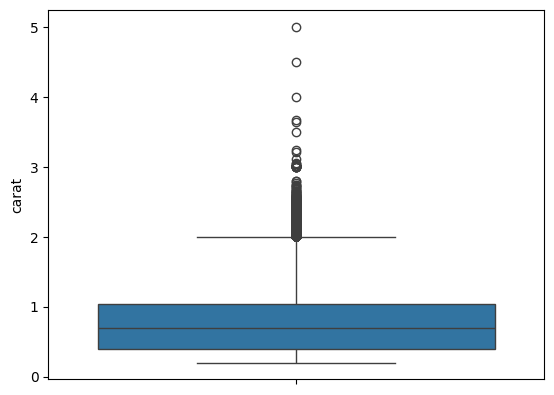

In [25]:
sns.boxplot(df.carat);
# There are outliers

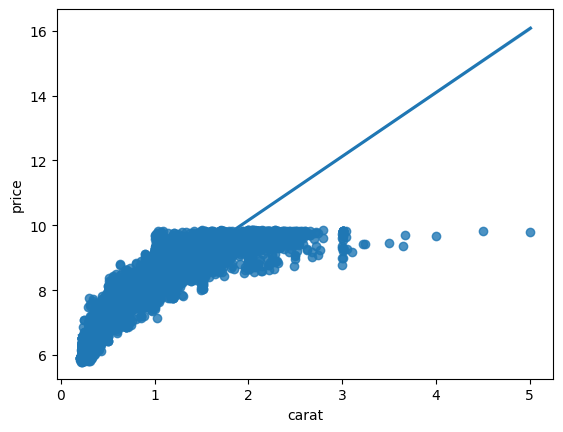

In [26]:
# How do these ouliers affect the relationship with price
sns.regplot(y = df.price, x= df.carat, fit_reg=True);
# After price value of 10, it doesn't go up with carat

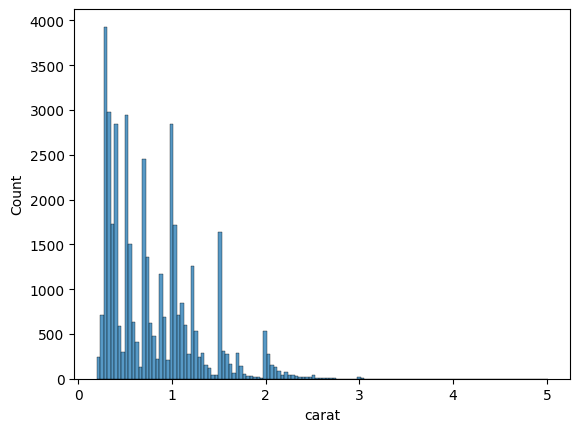

In [27]:
sns.histplot(df.carat); # Not normal

### Depth

In [28]:
df.depth.describe()

count    40455.000000
mean        61.748931
std          1.428056
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

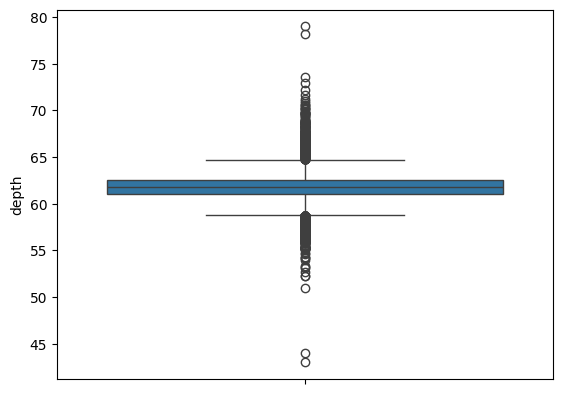

In [29]:
sns.boxplot(df.depth);
# Two extreme outliers over 75, and two extreme outliers below 45

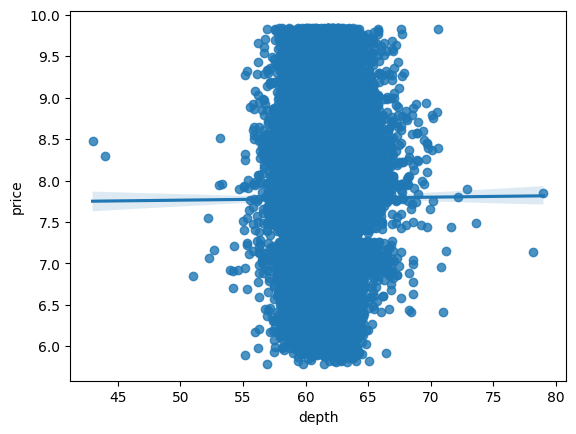

In [30]:
# How do these ouliers affect the relationship with price
sns.regplot(y = df.price, x= df.depth, fit_reg=True);
# Doesn't show correlation with price, probably will not be part of the model

In [31]:
df = df[(df["depth"] > 45) & (df["depth"] < 75)]

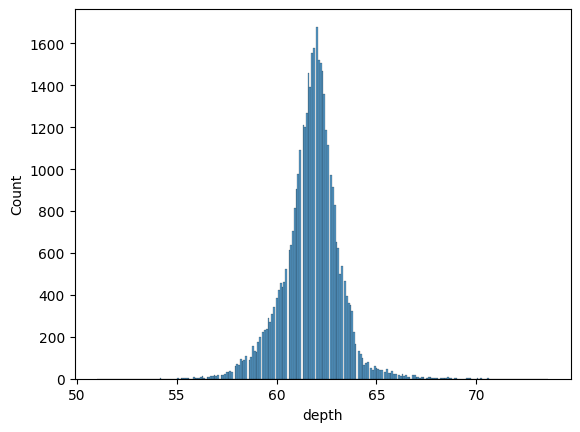

In [32]:
sns.histplot(df.depth); # seems already Normal, but also seems to have high kurtosis

### Table

In [33]:
df.table.describe()

count    40451.000000
mean        57.455316
std          2.235153
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

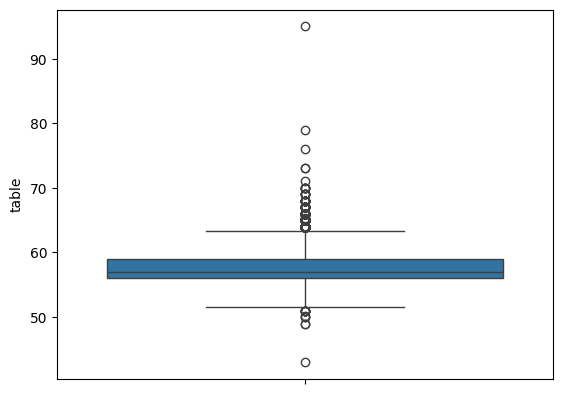

In [34]:
sns.boxplot(df.table);
# One extreme value over 90m and another extrem value, its min

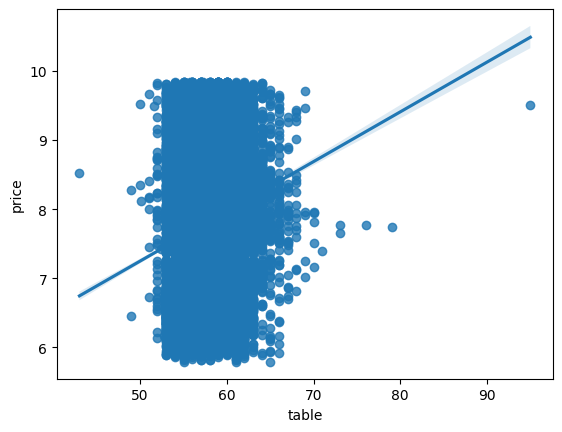

In [35]:
sns.regplot(y = df.price, x= df.table, fit_reg=True);
# Some of the outliers seem responsible for the reg curve on their own

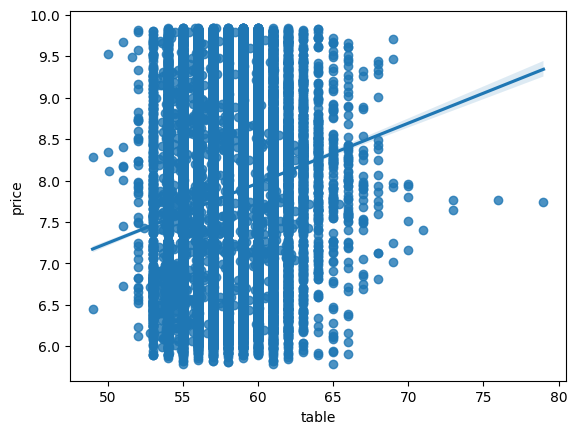

In [36]:
df = df[(df["table"] > df["table"].min()) & (df["table"] < df["table"].max())]
sns.regplot(y = df.price, x= df.table, fit_reg=True);

In [38]:
df = df[df["table"] < 75]

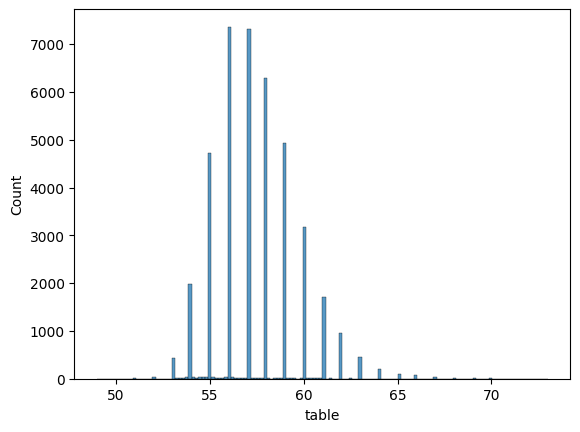

In [40]:
sns.histplot(df.table); # high variability between round values. It'll need standardization

### x

In [41]:
df.x.describe()
# The min is 0 (it shouldn't be 0)

count    40447.000000
mean         5.728179
std          1.121579
min          0.000000
25%          4.710000
50%          5.690000
75%          6.540000
max         10.740000
Name: x, dtype: float64

<Axes: ylabel='x'>

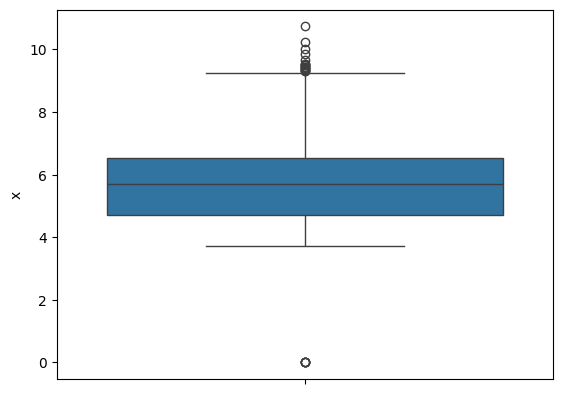

In [42]:
sns.boxplot(df.x)

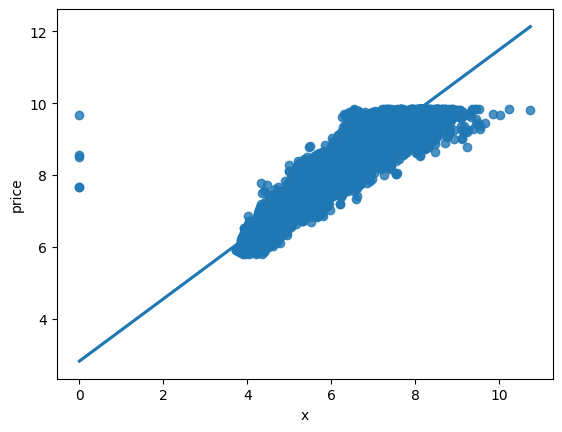

In [43]:
sns.regplot(y = df.price, x= df.x, fit_reg=True);
# Like carat, after price value of 10, it doesn't go up
# Outliers with value 0 are affecting the relationship

In [44]:
df = df.drop(df[df["x"] == 0].index)

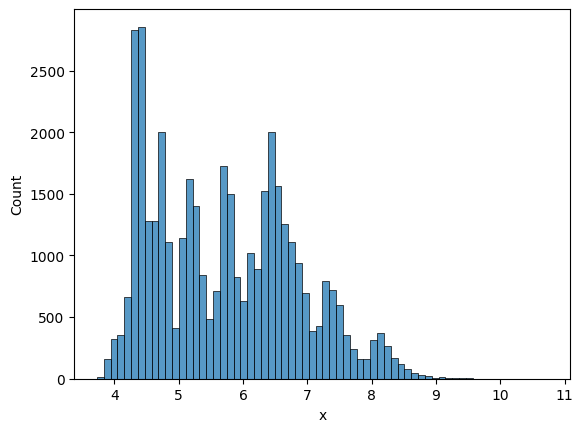

In [45]:
sns.histplot(df.x); # It'll need standardization

### y

In [46]:
df.y.describe()

count    40442.000000
mean         5.731668
std          1.119447
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         31.800000
Name: y, dtype: float64

<Axes: ylabel='y'>

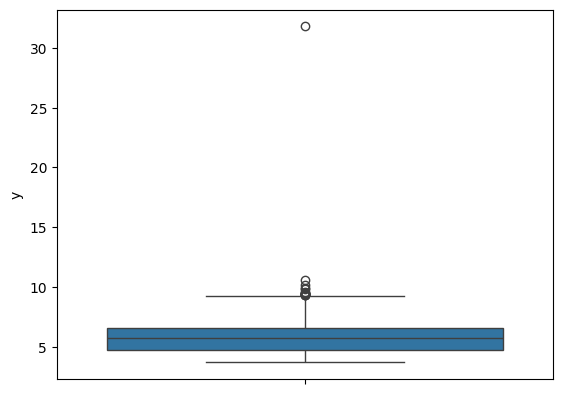

In [47]:
sns.boxplot(df.y)
# Extreme max value

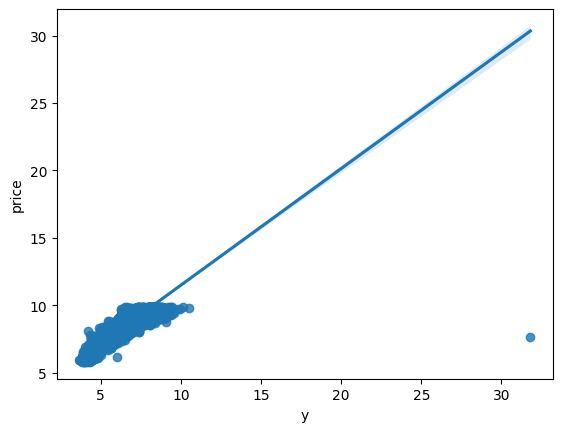

In [48]:
sns.regplot(y = df.price, x= df.y, fit_reg=True);
# Like carat and x, after price 10 it doesn't go up

In [49]:
df = df.drop(df[df["y"] == df["y"].max()].index)

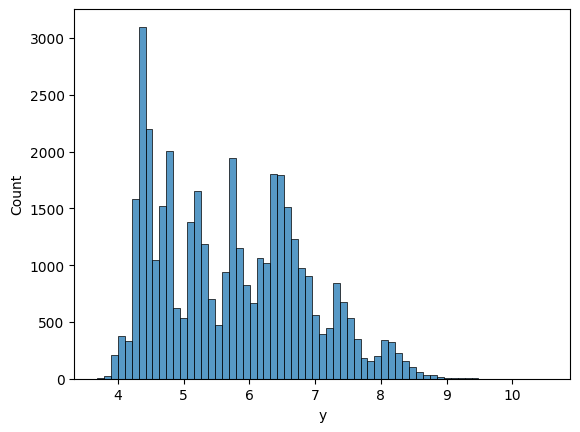

In [50]:
sns.histplot(df.y); # It'll need standardization

### z

In [51]:
df.z.describe()
# The min is 0 (it shouldn't be 0)

count    40441.000000
mean         3.537310
std          0.708151
min          0.000000
25%          2.910000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64

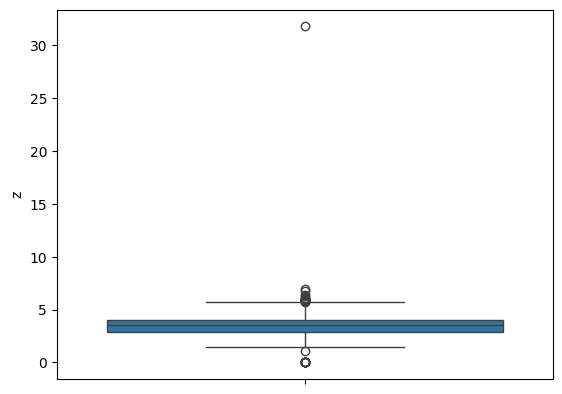

In [52]:
sns.boxplot(df.z);
# Extreme max value, and values 0

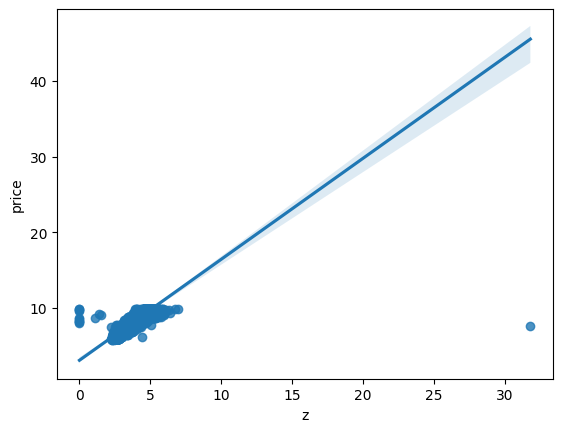

In [53]:
sns.regplot(y = df.price, x= df.z, fit_reg=True);

In [54]:
df = df.drop(df[df["z"] == 0].index)
df = df.drop(df[df["z"] == df["z"].max()].index)

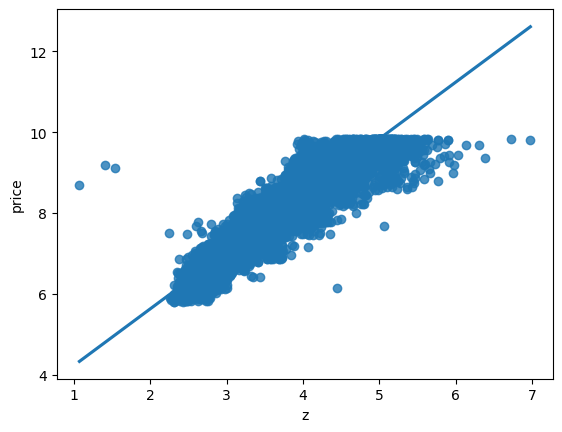

In [55]:
sns.regplot(y = df.price, x= df.z, fit_reg=True);
# values of z below 2 still clear outliers

In [56]:
df = df[df["z"] > 2]

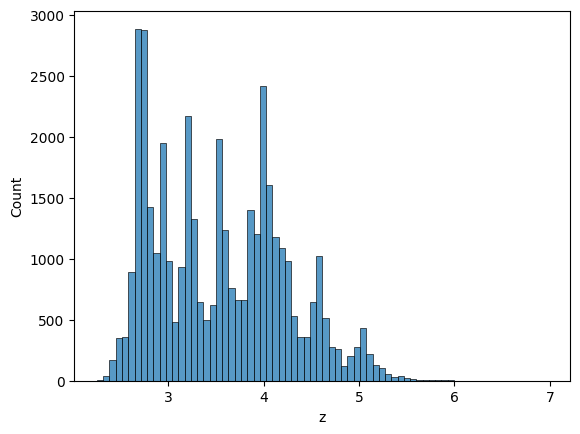

In [57]:
sns.histplot(df.z);

## Categorical variables

### Cut

In [58]:
df.cut.value_counts() # Categorical values with hierarchies -> Dictionary

cut
Ideal        16202
Premium      10288
Very Good     9078
Good          3669
Fair          1190
Name: count, dtype: int64

<Axes: xlabel='cut', ylabel='price'>

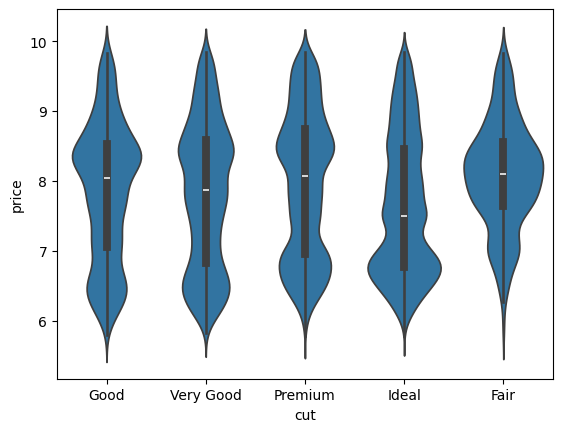

In [59]:
sns.violinplot(y = df.price, x = df.cut )
# Even though the categories seem hierarchical, their behaviour is not -> get dummies

## Color

In [60]:
df.color.value_counts() # Categorical values with hierarchies -> Dictionary

color
G    8523
E    7348
F    7161
H    6227
D    5101
I    3981
J    2086
Name: count, dtype: int64

<Axes: xlabel='color', ylabel='price'>

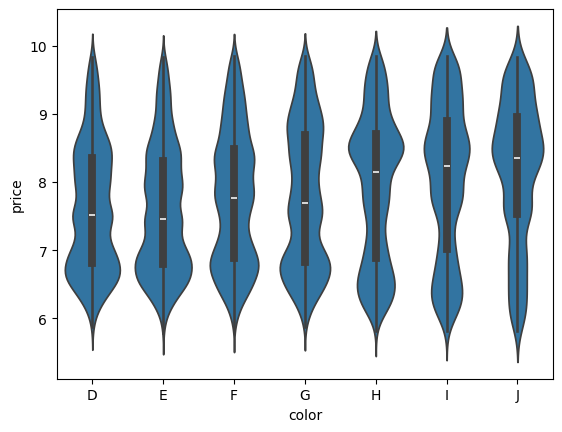

In [61]:
sns.violinplot(y = df.price, x = df.color, order=["D", "E", "F", "G", "H", "I", "J"])
# Their behaviour seems more hierarchical than cut -> dictionary

## Clarity

In [62]:
df.clarity.value_counts() # Categorical values with hierarchies -> Dictionary

clarity
SI1     9855
VS2     9190
SI2     6836
VS1     6069
VVS2    3848
VVS1    2728
IF      1367
I1       534
Name: count, dtype: int64

<Axes: xlabel='clarity', ylabel='price'>

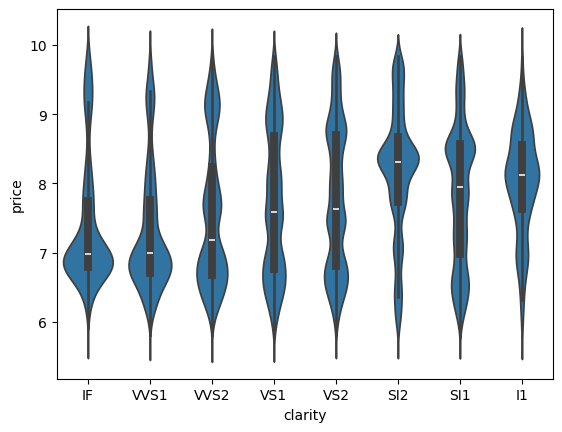

In [63]:
sns.violinplot(y = df.price, x = df.clarity, order=["IF", "VVS1", "VVS2", "VS1", "VS2", "SI2", "SI1", "I1"])
# Lower quality seems to have more price -> get dummies

# Transformations of categorical variables

## Cut to numeric

In [64]:
# Even though the categories seem hierarchical, their behaviour is not -> get dummies
onehotencoder = preprocessing.OneHotEncoder()
df[["Ideal", "Premium", "Very Good", "Good", "Fair"]] = onehotencoder.fit_transform(df["cut"].values.reshape(-1, 1)).toarray()
df.drop(columns="cut", inplace=True)

### Transform color to numeric

In [65]:
# Their behaviour seems more hierarchical than cut -> dictionary or get dummies
dict_color = {'D': 1,
              'E': 2,
              'F': 3,
              'G': 4,
              'H': 5,
              'I': 6,
              'J': 7}
df["color"] = df["color"].replace(dict_color)

### Transform clarity to numeric

In [66]:
# Lower quality seems to have more price -> get dummies
onehotencoder = preprocessing.OneHotEncoder()
df[["SI1", "VS2", "SI2", "VS1", "VVS2", "VVS1", "IF", "I1"]] = onehotencoder.fit_transform(df["clarity"].values.reshape(-1, 1)).toarray()

In [67]:
# other possibility
le = preprocessing.LabelEncoder()
df["clarity_encoded"] = le.fit_transform(df["clarity"])
df.drop(columns="clarity", inplace=True)

## Collinearity

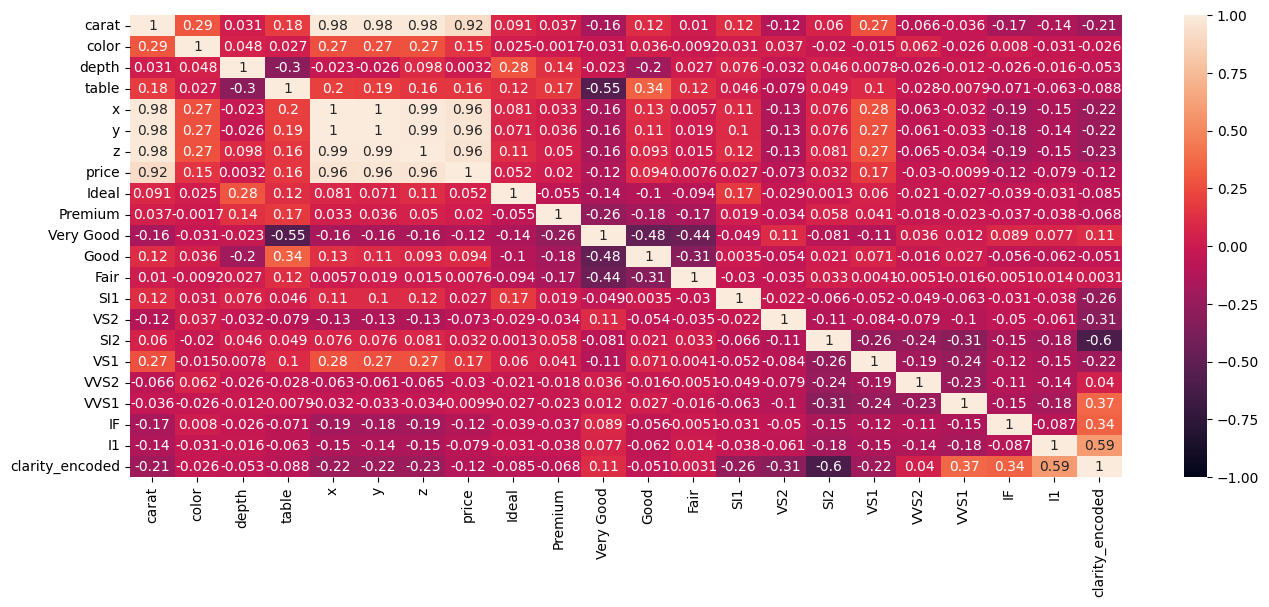

In [69]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.drop(columns=["id"]).corr(),vmin=-1, vmax=1, annot=True);
# carat is higly correlated to x, y and z, which are also highly correlated to each other (x and y have a corr of 1)
# categorical variables have poor correlation with price
    # clarity_encooded seems to perform better than each of its categories 

# Preparing the numerical data for training

In [70]:
X = df.drop(columns=["id", "price"])
y = df["price"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Train sample

### Standardization of carat

In [55]:
scaler = preprocessing.StandardScaler()

In [56]:
X_train["carat"] = scaler.fit_transform(X_train["carat"].values.reshape(-1, 1))

### Standardization of table

In [58]:
X_train["table"] = scaler.fit_transform(X_train["table"].values.reshape(-1, 1))

### Standardization of x

In [59]:
X_train["x"] = scaler.fit_transform(X_train["x"].values.reshape(-1, 1))

### Standardization of y

In [60]:
X_train["y"] = scaler.fit_transform(X_train["y"].values.reshape(-1, 1))

### Standardization of z

In [61]:
X_train["z"] = scaler.fit_transform(X_train["z"].values.reshape(-1, 1))

## Test sample

### Standardization of carat

In [62]:
X_test["carat"] = scaler.fit_transform(X_test["carat"].values.reshape(-1, 1))

### Standardization of table

In [63]:
X_test["table"] = scaler.fit_transform(X_test["table"].values.reshape(-1, 1))

### Standardization of x

In [64]:
X_test["x"] = scaler.fit_transform(X_test["x"].values.reshape(-1, 1))

### Standardization of y

In [65]:
X_test["y"] = scaler.fit_transform(X_test["y"].values.reshape(-1, 1))

### Standardization of z

In [66]:
X_test["z"] = scaler.fit_transform(X_test["z"].values.reshape(-1, 1))

# Models

In [70]:
X_train.columns

Index(['carat', 'color', 'table', 'x', 'y', 'z', 'Ideal', 'Premium',
       'Very Good', 'Good', 'Fair', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1',
       'IF', 'I1', 'clarity_encoded'],
      dtype='object')

In [78]:
models = {
    "lr": LinReg(),
    "ridge": Ridge(),
    "lasso": Lasso(), 
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "rfr": RandomForestRegressor(),
    "svr": SVR()
}

In [83]:
# With these features: all, except depth and the dummy version of clarity (keeping the encoded)
X_train_I = X_train.drop(columns=['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'])
X_test_I = X_test.drop(columns=['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'])

# 'carat', 'color', 'table', 'x', 'y', 'z', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded'
print(f"      Model I      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_I, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_I)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")

      Model I      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.20555769040256158
r2: 0.9586640735848136
Mean r2 scores after 5 crossvalidations: 0.9814039410270923
------------ridge------------

RMSE, error: 0.20555466007514805
r2: 0.9586652923226525
Mean r2 scores after 5 crossvalidations: 0.9814035003995176
------------lasso------------

RMSE, error: 1.0112833884347652
r2: -0.000474361105580412
Mean r2 scores after 5 crossvalidations: 0.14736670934606516
------------sgd------------

RMSE, error: 0.21458963930225625
r2: 0.9549517716126096


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Mean r2 scores after 5 crossvalidations: -1257988863198.8613
------------knn------------

RMSE, error: 0.1347684599000222
r2: 0.9822320735668928
Mean r2 scores after 5 crossvalidations: 0.9771182713112836
------------grad------------

RMSE, error: 0.11982247993354664
r2: 0.9859545122843031
Mean r2 scores after 5 crossvalidations: 0.9879718462910431
------------rfr------------

RMSE, error: 0.10033889431047217
r2: 0.9901508480295813
Mean r2 scores after 5 crossvalidations: 0.9917392882129368
------------svr------------

RMSE, error: 0.16004718074363739
r2: 0.9749414306012378
Mean r2 scores after 5 crossvalidations: 0.9776170145939593


In [84]:
# With these features: all, except depth and the encoded version of clarity
X_train_II = X_train.drop(columns='clarity_encoded')
X_test_II = X_test.drop(columns='clarity_encoded')

# 'carat', 'color', 'table', 'x', 'y', 'z', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair',
# 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'
print(f"      Model II      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_II, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_II)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")
    
# generally equal if encoded or dummies, for some models clarity dummies better than encoded

      Model II      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.13766901644528923
r2: 0.9814590221125383
Mean r2 scores after 5 crossvalidations: 0.9814039410270923
------------ridge------------

RMSE, error: 0.1376591400720322
r2: 0.9814616822760881
Mean r2 scores after 5 crossvalidations: 0.9814035003995176
------------lasso------------

RMSE, error: 1.0112833884347652
r2: -0.000474361105580412
Mean r2 scores after 5 crossvalidations: 0.14736670934606516
------------sgd------------

RMSE, error: 0.13839370171092394
r2: 0.9812633101338833


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Mean r2 scores after 5 crossvalidations: -2254386640631.3037
------------knn------------

RMSE, error: 0.13089516129353995
r2: 0.9832387114824509
Mean r2 scores after 5 crossvalidations: 0.9771182713112836
------------grad------------

RMSE, error: 0.11904863828752656
r2: 0.9861353445641685
Mean r2 scores after 5 crossvalidations: 0.9879703262843454
------------rfr------------

RMSE, error: 0.09778696678239024
r2: 0.9906454658056718
Mean r2 scores after 5 crossvalidations: 0.9917170103373222
------------svr------------

RMSE, error: 0.10538911261160573
r2: 0.9891344500650078
Mean r2 scores after 5 crossvalidations: 0.9776170145939593


In [85]:
# With these features: all, except depth and clarity
X_train_III = X_train.drop(columns=['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1', 'clarity_encoded'])
X_test_III = X_test.drop(columns=['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1', 'clarity_encoded'])

# 'carat', 'color', 'table', 'x', 'y', 'z', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair'        
print(f"      Model III      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_III, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_III)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")
# better with clarity dummies

      Model III      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.23020505900908153
r2: 0.9481570216451017
Mean r2 scores after 5 crossvalidations: 0.9814039410270923
------------ridge------------

RMSE, error: 0.2302060406238951
r2: 0.9481565795180326
Mean r2 scores after 5 crossvalidations: 0.9814035003995176
------------lasso------------

RMSE, error: 1.0112833884347652
r2: -0.000474361105580412
Mean r2 scores after 5 crossvalidations: 0.14736670934606516
------------sgd------------

RMSE, error: 0.23560740800584357
r2: 0.9456952148788517


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Mean r2 scores after 5 crossvalidations: -976613912990.0383
------------knn------------

RMSE, error: 0.2245276591986802
r2: 0.950682629377504
Mean r2 scores after 5 crossvalidations: 0.9771182713112836
------------grad------------

RMSE, error: 0.21153282190133685
r2: 0.9562260494807215
Mean r2 scores after 5 crossvalidations: 0.9879716559621882
------------rfr------------

RMSE, error: 0.21559360033047575
r2: 0.954529267873149
Mean r2 scores after 5 crossvalidations: 0.9917325004939983
------------svr------------

RMSE, error: 0.2134916521705442
r2: 0.9554115872271243
Mean r2 scores after 5 crossvalidations: 0.9776170145939593


In [87]:
# With these features: all, except depth, cut and the encoded version of clarity
X_train_IV = X_train.drop(columns=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded'])
X_test_IV = X_test.drop(columns=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded'])

# 'carat', 'color', 'table', 'x', 'y', 'z', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'
print(f"      Model IV      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_IV, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_IV)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")

      Model V      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.13960696345115792
r2: 0.9809333506967101
Mean r2 scores after 5 crossvalidations: 0.9814039410270923
------------ridge------------

RMSE, error: 0.13959760894466677
r2: 0.9809359057715387
Mean r2 scores after 5 crossvalidations: 0.9814035003995176
------------lasso------------

RMSE, error: 1.0112833884347652
r2: -0.000474361105580412
Mean r2 scores after 5 crossvalidations: 0.14736670934606516
------------sgd------------

RMSE, error: 0.14087291146707262
r2: 0.9805859923059417


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Mean r2 scores after 5 crossvalidations: -608415963248.2734
------------knn------------

RMSE, error: 0.11874550152771896
r2: 0.9862058625612344
Mean r2 scores after 5 crossvalidations: 0.9771182713112836
------------grad------------

RMSE, error: 0.12069540216332308
r2: 0.9857491204654095
Mean r2 scores after 5 crossvalidations: 0.9879706697269229
------------rfr------------

RMSE, error: 0.09951312770426995
r2: 0.9903122935797661
Mean r2 scores after 5 crossvalidations: 0.9917481293965535
------------svr------------

RMSE, error: 0.108592597662086
r2: 0.988463856205164
Mean r2 scores after 5 crossvalidations: 0.9776170145939593


In [89]:
# With these features: all, except depth, cut and clarity
X_train_V = X_train.drop(columns=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'])
X_test_V = X_test.drop(columns=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'])

# 'carat', 'color', 'table', 'x', 'y', 'z'
print(f"      Model V      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_V, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_V)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")
    
# better with clarity dummies, cut doesn't seem really necessary

      Model V      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.2345444035895123
r2: 0.9461841299211947
Mean r2 scores after 5 crossvalidations: 0.9814039410270923
------------ridge------------

RMSE, error: 0.23454802973165415
r2: 0.9461824658823185
Mean r2 scores after 5 crossvalidations: 0.9814035003995176
------------lasso------------

RMSE, error: 1.0112833884347652
r2: -0.000474361105580412
Mean r2 scores after 5 crossvalidations: 0.14736670934606516
------------sgd------------

RMSE, error: 0.23431337034671348
r2: 0.9462900981832756


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Mean r2 scores after 5 crossvalidations: -710844286986.6495
------------knn------------

RMSE, error: 0.2249313520912521
r2: 0.9505051281290614
Mean r2 scores after 5 crossvalidations: 0.9771182713112836
------------grad------------

RMSE, error: 0.2156741273953682
r2: 0.9544952936881665
Mean r2 scores after 5 crossvalidations: 0.9879713110202658
------------rfr------------

RMSE, error: 0.21684322185090252
r2: 0.9540006262197248
Mean r2 scores after 5 crossvalidations: 0.9917367019175046
------------svr------------

RMSE, error: 0.21786748870805953
r2: 0.9535650404558097
Mean r2 scores after 5 crossvalidations: 0.9776170145939593


In [90]:
# With these features: all, except y (had corr of 1 with x), depth, cut and the encoded version of clarity
X_train_VI = X_train.drop(columns=['y', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded'])
X_test_VI = X_test.drop(columns=['y', 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded'])

# 'carat', 'color', 'table', 'x', 'z', 'SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'
print(f"      Model VI      \n")
for model in models.values():
    print(f"Training: {model}")
    model.fit(X_train_VI, y_train)
for name, model in models.items():
    y_pred = model.predict(X_test_VI)
    print(f"------------{name}------------\n")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print(f"Mean r2 scores after 5 crossvalidations: {cvs(model, X, y, scoring='r2', cv=5).mean()}")

      Model VI      

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: RandomForestRegressor()
Training: SVR()
------------lr------------

RMSE, error: 0.140214193962429
r2: 0.9807671264588156
Mean r2 scores after 5 crossvalidations: 0.9814039410270923
------------ridge------------

RMSE, error: 0.14021989131621335
r2: 0.9807655634400088
Mean r2 scores after 5 crossvalidations: 0.9814035003995176
------------lasso------------

RMSE, error: 1.0112833884347652
r2: -0.000474361105580412
Mean r2 scores after 5 crossvalidations: 0.14736670934606516
------------sgd------------

RMSE, error: 0.140369939409888
r2: 0.9807243762061306


C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.wa

Mean r2 scores after 5 crossvalidations: -1721346642686.8958
------------knn------------

RMSE, error: 0.12493938745139642
r2: 0.9847292994365886
Mean r2 scores after 5 crossvalidations: 0.9771182713112836
------------grad------------

RMSE, error: 0.1250897941402427
r2: 0.9846925104295186
Mean r2 scores after 5 crossvalidations: 0.9879706233360969
------------rfr------------

RMSE, error: 0.11854217422273013
r2: 0.9862530613771252
Mean r2 scores after 5 crossvalidations: 0.9917242894228544
------------svr------------

RMSE, error: 0.11560664395778156
r2: 0.9869254784766163
Mean r2 scores after 5 crossvalidations: 0.9776170145939593


In [ ]:
# Best model is rfr with variables of MODEL IV:

X_train = X_train.drop(columns=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded'])
X_test = X_test.drop(columns=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair', 'clarity_encoded'])
rfr.fit(X_train, y_train)


## Metrics for the train sample

# Test csv, cleaning

In [223]:
df_test = pd.read_csv("Guided example/test.csv")
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
6302,6302,0.54,Very Good,D,VS2,63.2,55.0,5.21,5.17,3.28


In [224]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


In [225]:
df_test.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [226]:
df_test["carat"] = scaler.fit_transform(df_test["carat"].values.reshape(-1, 1))

In [227]:
df_test["cut"] = df_test["cut"].replace(dict_cut)

In [228]:
df_test["color"] = le.fit_transform(df_test["color"])

In [229]:
df_test[["SI1", "VS2", "SI2", "VS1", "VVS2", "VVS1", "IF", "I1"]] = onehotencoder.fit_transform(df_test["clarity"].values.reshape(-1, 1)).toarray()
df_test.drop(columns="clarity", inplace=True)

In [230]:
df["depth"] = scaler.fit_transform(df["depth"].values.reshape(-1, 1))

In [231]:
df_test["table"] = scaler.fit_transform(df_test["table"].values.reshape(-1, 1))

In [232]:
df_test.sample()

,id,carat,cut,color,depth,table,x,y,z,SI1,VS2,SI2,VS1,VVS2,VVS1,IF,I1
50,50,2.633736,2,6,60.1,0.241249,8.25,8.19,4.94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [233]:
X_df_test = df_test.drop(columns="id")

# Final model

In [239]:
grad = GradientBoostingRegressor()
grad.fit(X, y) # We use the whole data, as this dataset contains the train sample, and the test sample comes from another csv

GradientBoostingRegressor()

In [240]:
df_test["price_pred"] = grad.predict(X_df_test)
df_test.sample(10)

,id,carat,cut,color,depth,table,x,y,z,SI1,VS2,SI2,VS1,VVS2,VVS1,IF,I1,price_pred
11093,11093,-0.213770,1,3,61.0,-0.656384,5.74,5.77,3.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.573780
3460,3460,0.461194,1,3,62.2,-0.656384,6.46,6.40,4.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.640677
2143,2143,-0.973105,1,0,61.7,-0.656384,4.48,4.46,2.76,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.587442
11773,11773,-0.023936,1,3,62.3,-0.207567,5.90,5.85,3.66,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.360162
3940,3940,-0.509067,3,0,62.8,-0.207567,5.25,5.29,3.31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.329115
8502,8502,-0.487974,1,1,62.1,-1.284728,5.31,5.35,3.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.554424
8230,8230,-0.909827,3,1,63.7,-0.656384,4.54,4.60,2.91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.252191
12681,12681,-0.614530,3,2,63.1,-0.207567,5.10,5.08,3.21,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.228595
5561,5561,-0.277048,3,3,59.4,0.869593,5.71,5.80,3.41,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.278365
6124,6124,0.334639,5,6,59.5,1.138883,6.28,6.23,3.72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.025861


In [241]:
submission = df_test[["id", "price_pred"]]
submission = submission.rename(columns= {"id": "ID", "price_pred": "price"})

In [242]:
submission.head()

,ID,price
0,0,9.391558
1,1,8.827922
2,2,9.511017
3,3,9.360971
4,4,9.579360


In [243]:
submission.to_csv("submission.csv", index=False)

In [244]:
submission.shape

(13485, 2)

In [ ]:
# Terrible score in kagle 1.41214

In [127]:
lr = LinReg()
lr.fit(X, y)
df_test["price_pred"] = lr.predict(X_df_test)
submission = df_test[["id", "y_pred"]]
submission = submission.rename(columns= {"id": "ID", "y_pred": "price"})
submission.to_csv("submission.csv", index=False)
# Terrible score in kagle 1.41214

In [128]:
ridge = Ridge()
ridge.fit(X, y)
df_test["price_pred"] = ridge.predict(X_df_test)
submission = df_test[["id", "y_pred"]]
submission = submission.rename(columns= {"id": "ID", "y_pred": "price"})
submission.to_csv("submission.csv", index=False)
# Terrible score in kagle 1.41214

In [ ]:
sgd = SGDRegressor()
sgd.fit(X, y)
df_test["price_pred"] = sgd.predict(X_df_test)


In [ ]:
knn = KNeighborsRegressor()
knn.fit(X, y)
df_test["price_pred"] = knn.predict(X_df_test)


In [ ]:
svr = SVR()
svr.fit(X, y)
df_test["price_pred"] = svr.predict(X_df_test)
